In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib.colors import LinearSegmentedColormap
import xarray as xr
import cmocean.cm as cmo 
import gsw
from mpl_toolkits.axes_grid1 import make_axes_locatable
from Useful import *
from matplotlib.collections import PolyCollection
from scipy.spatial import Delaunay

from scipy.interpolate import griddata
from scipy.spatial import KDTree
import matplotlib.gridspec as gridspec

# View from top


## Data

In [3]:
path ='../../../automated_testing/integrated_tests/idealised/Thule/archive/Thule_LAD/results_5km_iceocean1r_spinup20/'
path_10 ='../../../automated_testing/integrated_tests/idealised/Thule/archive/Thule_LAD/results_5km_iceocean1r_spinup10/'
path_quad  ='../../../automated_testing/integrated_tests/idealised/Thule/archive/Thule_QUAD/results_5km_iceocean1r_10/'

In [3]:
Lad = xr.open_dataset(path + 'main_output_ANT_00001.nc')
Quad =  xr.open_dataset(path_quad + 'main_output_ANT_00001.nc')

In [4]:
Va  = Lad['V']
V = Va.T

Tria = Lad['Tri']-1  
Tri = Tria.T

triang = tri.Triangulation(V[:, 0], V[:, 1], Tri)



Vaq  = Quad['V']
Vq= Vaq.T

Triaq = Quad['Tri']-1  
Triq = Triaq.T

triangq = tri.Triangulation(Vq[:, 0], Vq[:, 1], Triq)

In [5]:
Hi_l = Lad['Hi']
Hib_l = Lad['Hib']
Hs_l = Lad['Hs']
Hb_l = Lad['Hb']
BMB_l = Lad['BMB']
E = Lad['entr']
Em = Lad['entr_dmin']
melt = Lad['melt']
So = Lad['S_ocean']
To = Lad['T_ocean']
T_fp = Lad['T_freezing_point']


In [15]:
Hi_q = Quad['Hi']
BMB_q = Quad['BMB']

In [7]:
S_lad = Lad['S_lad']
H_lad = Lad['H_lad']
T_lad = Lad['T_lad']
U_lad = Lad['U_lad']
V_lad = Lad['V_lad']

In [8]:
mask_gr = Lad['mask_grounded_ice']

In [9]:
Lad_g = xr.open_dataset(path + 'main_output_ANT_grid.nc')

In [10]:
u = 0
n = 800000

In [11]:
distances = np.sqrt(V[:, 0]**2 + V[:, 1]**2)
radius = 750000
mask_ocean = distances <= radius
mask_SL = Hb_l[u] < 0
p = 0.01
mask_floating = (Hs_l[u] - Hi_l[u] - Hb_l[u] <= p)
mask_rock= ~mask_floating

## Results

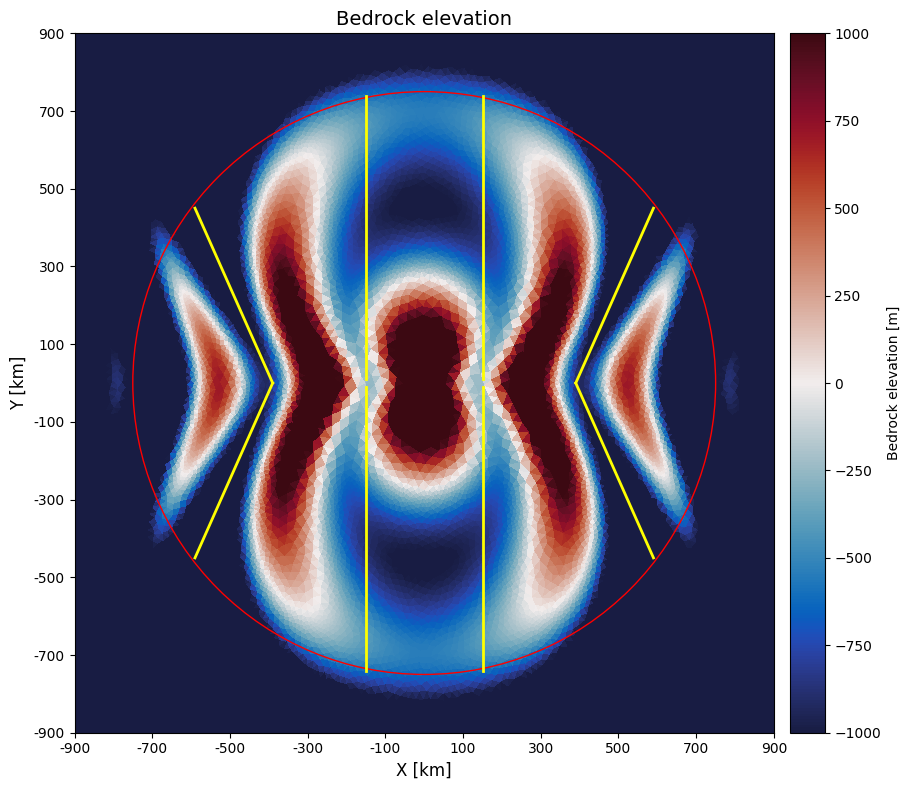

In [12]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 1, 
}

n = 900000
##############################################################################################################################
fig, ax = plt.subplots(1, 1, figsize=(16, 8)) 

c0 = ax.tripcolor(triang, Hb_l[u], cmap=cmo.balance , vmin=-1000, vmax=1000)
fig.colorbar(c0, ax=ax, label="Bedrock elevation [m]", **colorbar_kwargs)
ax.set_title('Bedrock elevation', fontsize=14)
circle = plt.Circle((0, 0), 750000, color='red', fill=False, linestyle='-', linewidth=1)
ax.add_artist(circle)
ax.set_aspect('equal')
ax.set_xlabel('X [km]', fontsize=12)
ax.set_ylabel('Y [km]', fontsize=12)
ax.set_xticks(np.arange(-n, n + 1, 200000))
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_xlim(-n, n)
ax.set_ylim(-n, n)

ax.plot([150000, 150000], [10000, 740000], color='yellow', linestyle='-', linewidth=2)
ax.plot([150000, 150000], [-10000, -740000], color='yellow', linestyle='-', linewidth=2)
ax.plot([-150000, -150000], [10000, 740000], color='yellow', linestyle='-', linewidth=2)
ax.plot([-150000, -150000], [-10000, -740000], color='yellow', linestyle='-', linewidth=2)


ax.plot([390000, 590000], [0, 450000], color='yellow', linestyle='-', linewidth=2)
ax.plot([-390000, -590000], [0, 450000], color='yellow', linestyle='-', linewidth=2)
ax.plot([-390000,- 590000], [0, -450000], color='yellow', linestyle='-', linewidth=2)
ax.plot([390000, 590000], [0, -450000], color='yellow', linestyle='-', linewidth=2)

plt.tight_layout()
plt.show()

### Ice

In [13]:
u = 0 

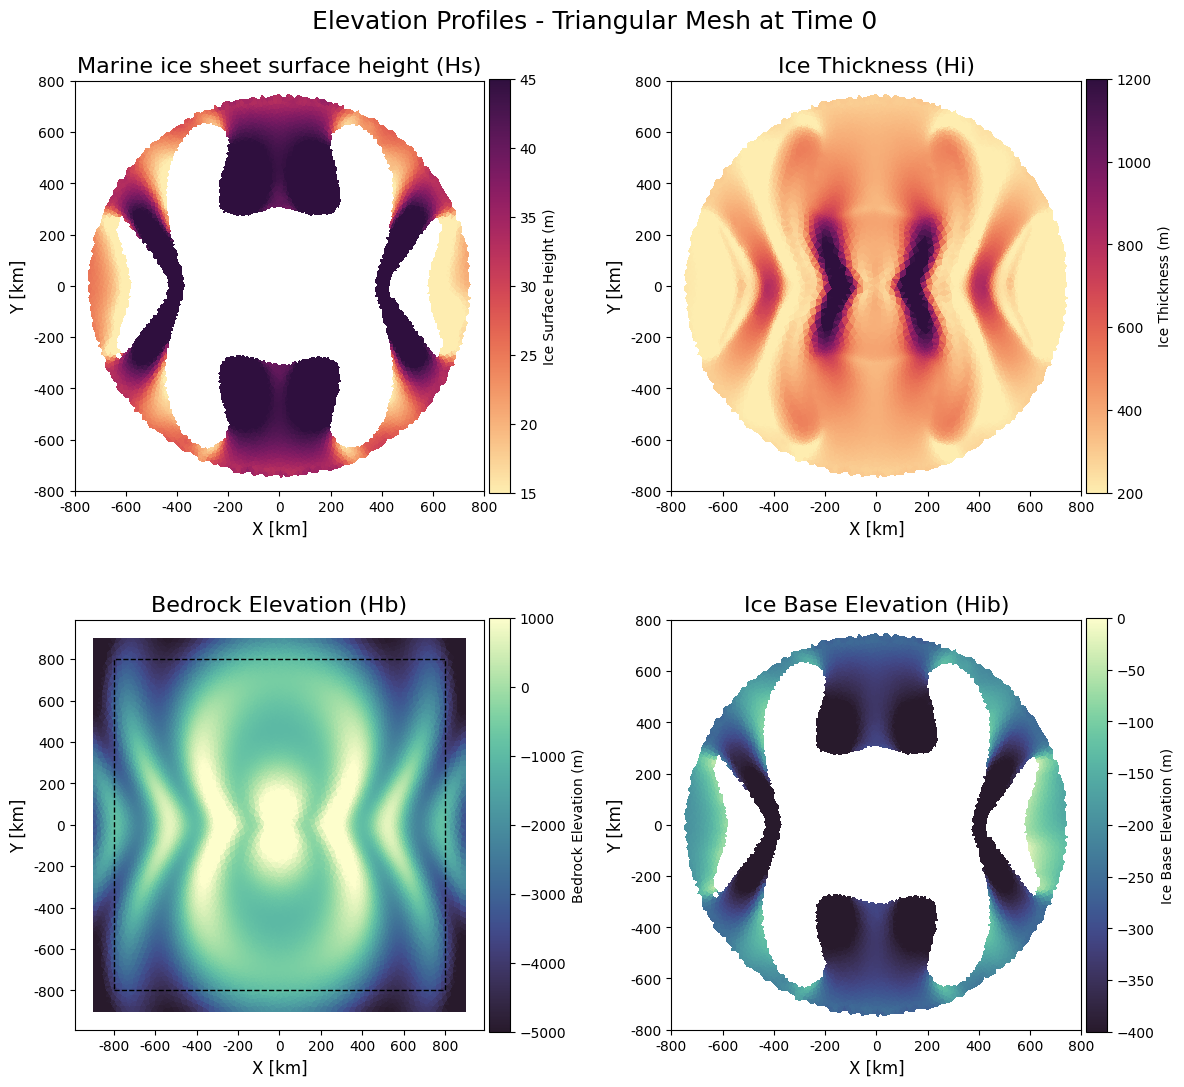

In [35]:
n = 800000

colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 0.8, 
}

##############################################################################################################################

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle(f'Elevation Profiles - Triangular Mesh at Time {u}', fontsize=18, x=0.5, y=0.92)


c0 = ax[0, 0].tripcolor(triang, Hs_l[u].where(mask_ocean & mask_rock ), cmap=cmo.matter, vmin = 15 , vmax = 45)
fig.colorbar(c0, ax=ax[0, 0], label="Ice Surface Height (m)", **colorbar_kwargs)
ax[0, 0].set_title('Marine ice sheet surface height (Hs)', fontsize=14)
#cont0 = ax[0, 0].tricontour(triang, Hs_l[u], levels=[0, 500, 1000, 1500], colors='k', linewidths=1)
#ax[0, 0].clabel(cont0, inline=True, fontsize=8)
ax[0, 0].set_xlim(-n,n)
ax[0, 0].set_ylim(-n,n)


c1 = ax[0, 1].tripcolor(triang, Hi_l[u].where(mask_ocean), cmap=cmo.matter, vmin = 200, vmax=1200)
fig.colorbar(c1, ax=ax[0, 1], label="Ice Thickness (m)", **colorbar_kwargs)
ax[0, 1].set_title('Ice Thickness (Hi)', fontsize=14)
#cont1 = ax[0, 1].tricontour(triang, Hi_l[u], levels=[0, 500, 1000, 1500], colors='k', linewidths=1)
#ax[0, 1].clabel(cont1, inline=True, fontsize=8)
ax[0, 1].set_xlim(-n,n)
ax[0, 1].set_ylim(-n,n)


c2 = ax[1, 0].tripcolor(triang, Hb_l[u], cmap=cmo.deep_r, vmin=-5000, vmax=1000)
fig.colorbar(c2, ax=ax[1, 0], label="Bedrock Elevation (m)", **colorbar_kwargs)
ax[1, 0].set_title('Bedrock Elevation (Hb)', fontsize=14)
#cont2 = ax[1, 0].tricontour(triang, Hb_l[u], levels=[-700, -500, -250, 0, 250], colors='k', linewidths=1)
#ax[1, 0].clabel(cont2, inline=True, fontsize=8)
box_x = [-800000, 800000, 800000, -800000, -800000]
box_y = [-800000, -800000, 800000, 800000, -800000]
ax[1, 0].plot(box_x, box_y, color='black', linestyle='--', linewidth=1)


c3 = ax[1, 1].tripcolor(triang, Hib_l[u].where(mask_ocean & mask_rock), cmap=cmo.deep_r , vmin = -400, vmax=0)
fig.colorbar(c3, ax=ax[1, 1], label="Ice Base Elevation (m)", **colorbar_kwargs)
ax[1, 1].set_title('Ice Base Elevation (Hib)', fontsize=14)
#cont3 = ax[1, 1].tricontour(triang, Hs_l[u] - Hi_l[u], levels=[-600, -300, 0, 300], colors='k', linewidths=1)
#ax[1, 1].clabel(cont3, inline=True, fontsize=8)
ax[1, 1].set_xlim(-n,n)
ax[1, 1].set_ylim(-n,n)
 

for i in range(2):
    for j in range(2):
        ax[i, j].set_aspect('equal')
        ax[i, j].title.set_fontsize(16)
        ax[i, j].set_xlabel('X [km]', fontsize=12)
        ax[i, j].set_ylabel('Y [km]', fontsize=12)
        ax[i, j].set_xticks(np.arange(-n, n + 1, 200000))
        ax[i, j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
        ax[i, j].set_yticks(np.arange(-n, n + 1, 200000))
        ax[i, j].set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_10896/1768088864.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_10896/1768088864.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))


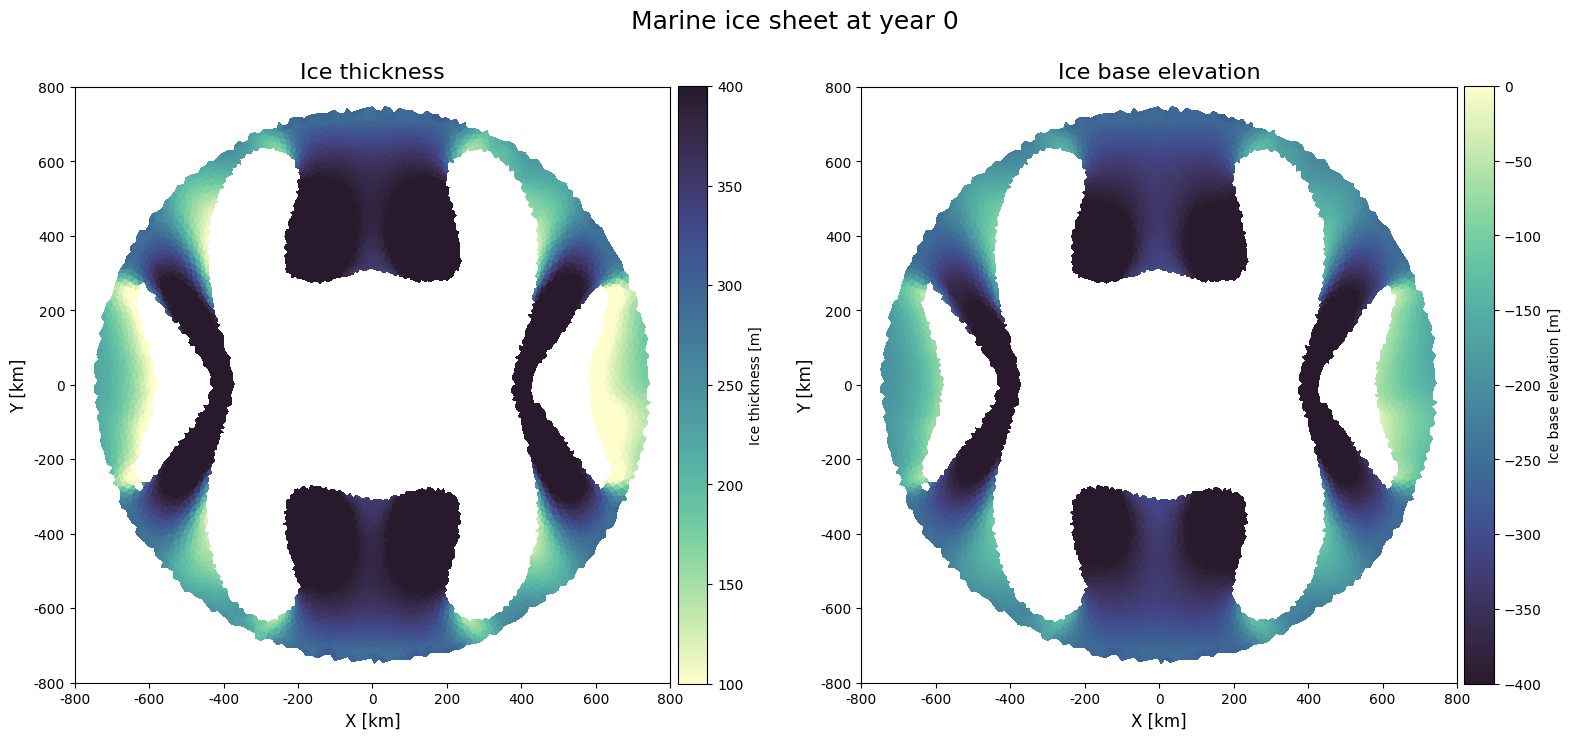

In [36]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 0.865, 
}
##############################################################################################################################
fig, ax = plt.subplots(1, 2, figsize=(16, 8)) 
fig.suptitle(f'Marine ice sheet at year {u}', fontsize=18, x=0.5, y=0.92)

c0 = ax[0].tripcolor(triang, Hi_l[u].where(mask_ocean & mask_rock), cmap=cmo.deep, vmin = 100, vmax = 400)
fig.colorbar(c0, ax=ax[0], label="Ice thickness [m]", **colorbar_kwargs)
ax[0].set_title('Ice thickness', fontsize=14)
#cont1 = ax[0].tricontour(triang, S_lad[u], levels=[30,31,32,33,34], colors='r', linewidths=1)
#ax[0].clabel(cont1, inline=True, fontsize=8)

c1 = ax[1].tripcolor(triang, Hs_l[u].where(mask_ocean & mask_rock) - Hi_l[u].where(mask_ocean & mask_rock), cmap=cmo.deep_r, vmin = -400, vmax = 0)
fig.colorbar(c1, ax=ax[1], label="Ice base elevation [m]", **colorbar_kwargs)
ax[1].set_title('Ice base elevation', fontsize=14)
#cont2 = ax[1].tricontour(triang, T_lad[u], levels=[-1.5,-1,-0.5], colors='k', linewidths=1)
#ax[1].clabel(cont2, inline=True, fontsize=8)

for j in range(2):
    ax[j].set_aspect('equal')
    ax[j].title.set_fontsize(16)
    ax[j].set_xlabel('X [km]', fontsize=12)
    ax[j].set_ylabel('Y [km]', fontsize=12)
    #ax[j].tripcolor(triang, mask_rock.where(mask_rock), facecolor='beige', edgecolor='none')  # Color masked area in beige
    ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_yticks(np.arange(-n, n + 1, 200000))
    ax[j].set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_xlim(-n, n)
    ax[j].set_ylim(-n, n)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [1]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 0.865, 
}
##############################################################################################################################
fig, ax = plt.subplots(1, 2, figsize=(16, 8)) 
fig.suptitle(f'Melting year {u}', fontsize=18, x=0.5, y=0.92)

c0 = ax[0].tripcolor(triang, BMB_l[u].where(mask_ocean & mask_rock), cmap=cmo.matter, vmin = -30, vmax = 0)
fig.colorbar(c0, ax=ax[0], label="Basal melt[m/year]", **colorbar_kwargs)
ax[0].set_title('Basal melt balance', fontsize=14)

c1 = ax[1].tripcolor(triang, melt[u].where(mask_ocean & mask_rock)*24*3600*35, cmap=cmo.matter, vmin = 0, vmax = 5)
fig.colorbar(c1, ax=ax[1], label="Melt [m/year]", **colorbar_kwargs)
ax[1].set_title('Melt rate', fontsize=14)

for j in range(2):
    ax[j].set_aspect('equal')
    ax[j].title.set_fontsize(16)
    ax[j].set_xlabel('X [km]', fontsize=12)
    ax[j].set_ylabel('Y [km]', fontsize=12)
    #ax[j].tripcolor(triang, mask_rock.where(mask_rock), facecolor='beige', edgecolor='none')  # Color masked area in beige
    ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_yticks(np.arange(-n, n + 1, 200000))
    ax[j].set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_xlim(-n, n)
    ax[j].set_ylim(-n, n)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

NameError: name 'plt' is not defined

### LADDIE 

/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_974/1165813899.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_974/1165813899.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))


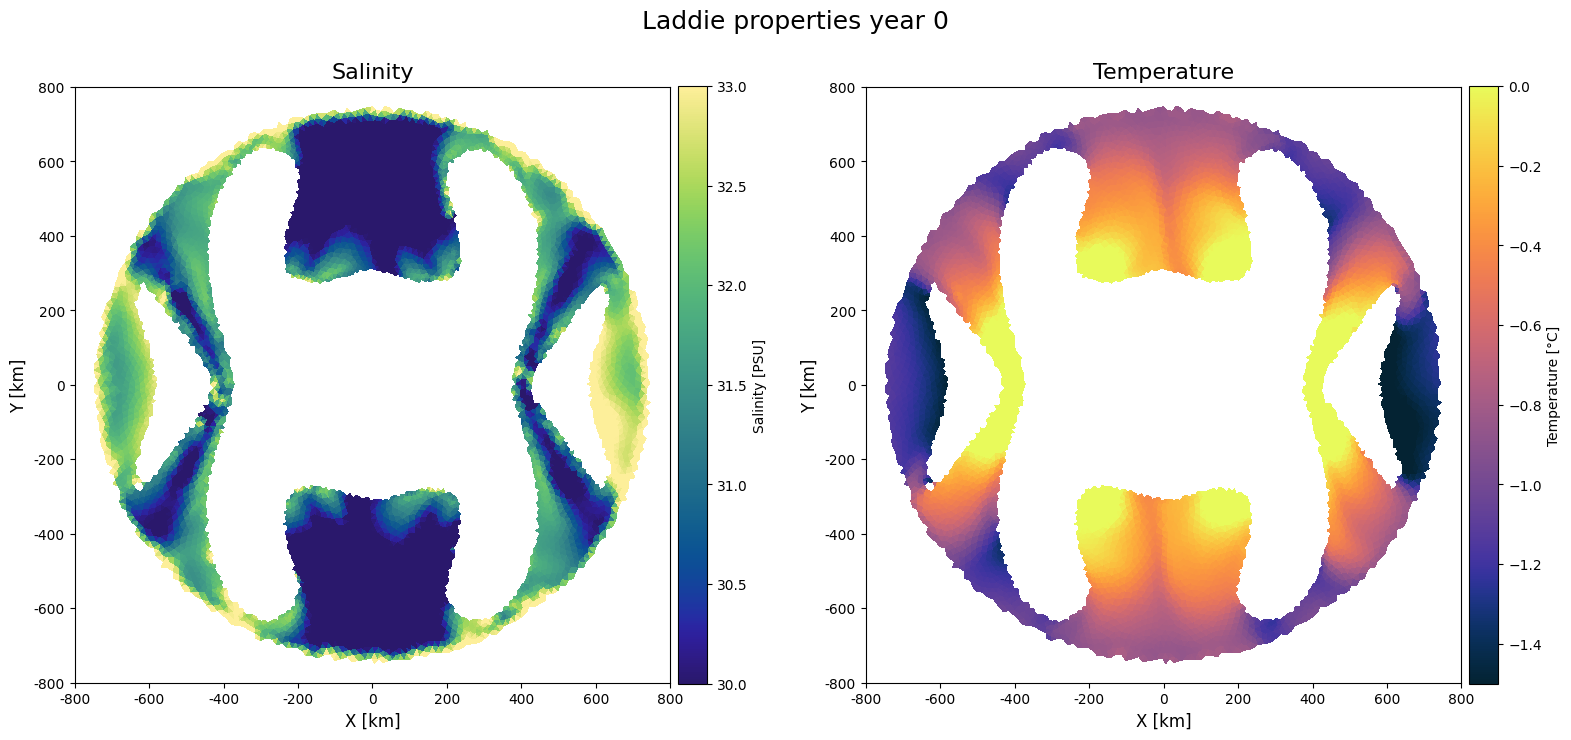

In [17]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 0.865, 
}
##############################################################################################################################
fig, ax = plt.subplots(1, 2, figsize=(16, 8)) 
fig.suptitle(f'Laddie properties year {u}', fontsize=18, x=0.5, y=0.92)

c0 = ax[0].tripcolor(triang, S_lad[u].where(mask_ocean & mask_rock), cmap=cmo.haline, vmin = 30, vmax = 33)
fig.colorbar(c0, ax=ax[0], label="Salinity [PSU]", **colorbar_kwargs)
ax[0].set_title('Salinity', fontsize=14)
#cont1 = ax[0].tricontour(triang, S_lad[u], levels=[30,31,32,33,34], colors='r', linewidths=1)
#ax[0].clabel(cont1, inline=True, fontsize=8)

c1 = ax[1].tripcolor(triang, T_lad[u].where(mask_ocean & mask_rock), cmap=cmo.thermal, vmin = -1.5, vmax = 0)
fig.colorbar(c1, ax=ax[1], label="Temperature [°C]", **colorbar_kwargs)
ax[1].set_title('Temperature', fontsize=14)
#cont2 = ax[1].tricontour(triang, T_lad[u], levels=[-1.5,-1,-0.5], colors='k', linewidths=1)
#ax[1].clabel(cont2, inline=True, fontsize=8)

for j in range(2):
    ax[j].set_aspect('equal')
    ax[j].title.set_fontsize(16)
    ax[j].set_xlabel('X [km]', fontsize=12)
    ax[j].set_ylabel('Y [km]', fontsize=12)
    #ax[j].tripcolor(triang, mask_rock.where(mask_rock), facecolor='beige', edgecolor='none')  # Color masked area in beige
    ax[j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_yticks(np.arange(-n, n + 1, 200000))
    ax[j].set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax[j].set_xlim(-n, n)
    ax[j].set_ylim(-n, n)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

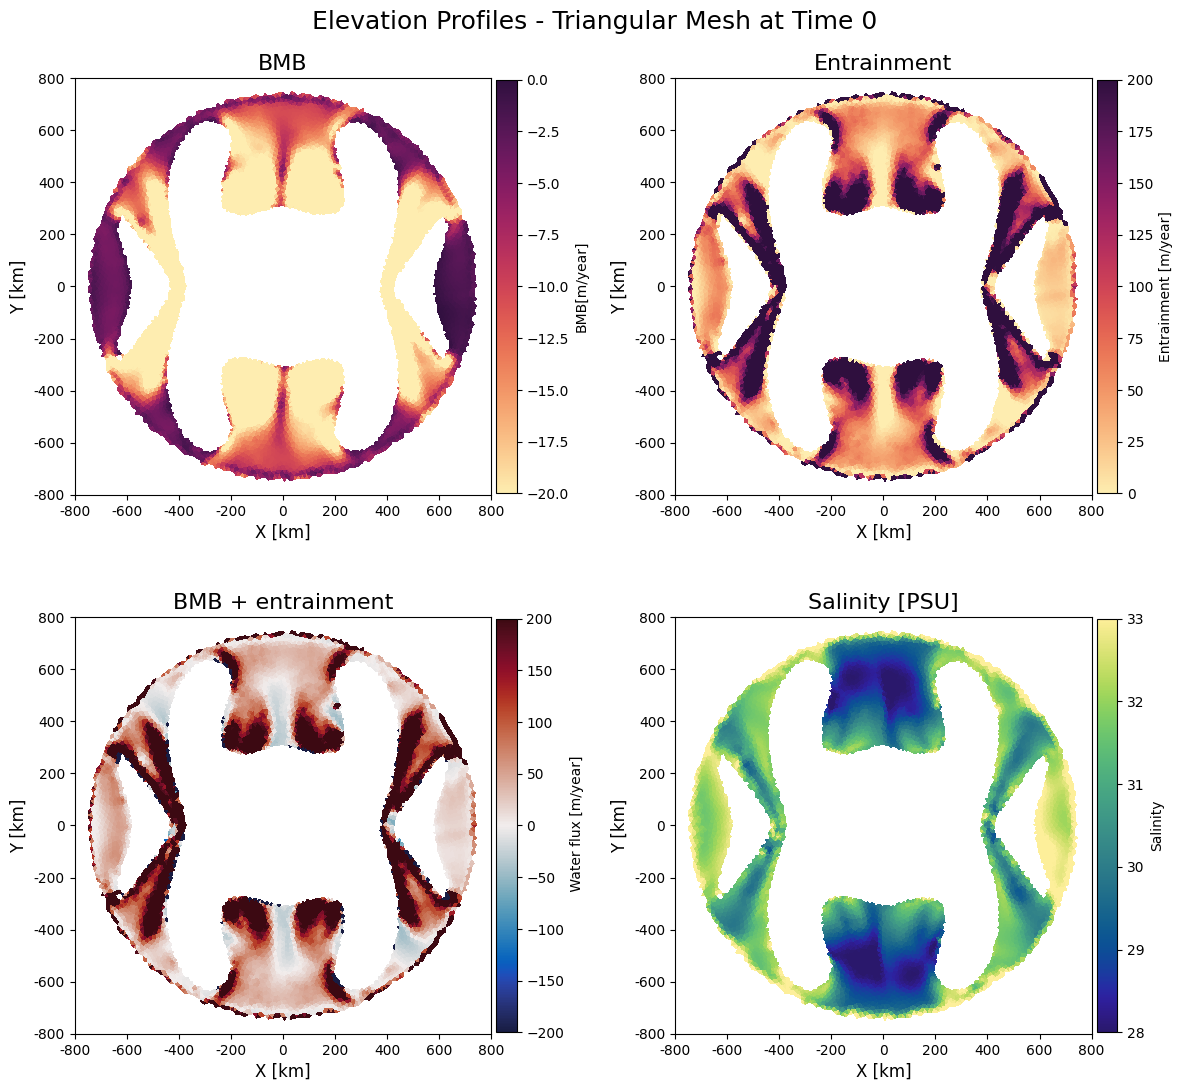

In [18]:
n = 800000

colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 0.8, 
}
 
u = 0
 #############################################################################################################################

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle(f'Elevation Profiles - Triangular Mesh at Time {u}', fontsize=18, x=0.5, y=0.92)


c0 = ax[0, 0].tripcolor(triang, BMB_l[u].where(mask_ocean & mask_rock), cmap=cmo.matter, vmin = -20 , vmax = 0)
fig.colorbar(c0, ax=ax[0, 0], label="BMB[m/year]", **colorbar_kwargs)
ax[0, 0].set_title('BMB', fontsize=14)



c1 = ax[0, 1].tripcolor(triang, E[u].where(mask_ocean & mask_rock)*24*3600*365, cmap=cmo.matter, vmin = 0, vmax=200)
fig.colorbar(c1, ax=ax[0, 1], label="Entrainment [m/year]", **colorbar_kwargs)
ax[0, 1].set_title('Entrainment', fontsize=14)



c2 = ax[1, 0].tripcolor(triang, E[u].where(mask_ocean & mask_rock)*24*3600*365+BMB_l[u].where(mask_ocean & mask_rock), cmap=cmo.balance, vmin=-200, vmax=200)
fig.colorbar(c2, ax=ax[1, 0], label=" Water flux [m/year]", **colorbar_kwargs)
ax[1, 0].set_title('BMB + entrainment', fontsize=14)

c3 = ax[1, 1].tripcolor(triang, S_lad[u].where(mask_ocean & mask_rock), cmap=cmo.haline , vmin =28, vmax=33)
fig.colorbar(c3, ax=ax[1, 1], label="Salinity", **colorbar_kwargs)
ax[1, 1].set_title('Salinity [PSU]', fontsize=14)


for i in range(2):
    for j in range(2):
        ax[i, j].set_aspect('equal')
        ax[i, j].title.set_fontsize(16)
        ax[i, j].set_xlabel('X [km]', fontsize=12)
        ax[i, j].set_ylabel('Y [km]', fontsize=12)
        ax[i, j].set_xticks(np.arange(-n, n + 1, 200000))
        ax[i, j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
        ax[i, j].set_yticks(np.arange(-n, n + 1, 200000))
        ax[i, j].set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
        ax[i, j].set_xlim(-n,n)
        ax[i, j].set_ylim(-n,n)
 


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




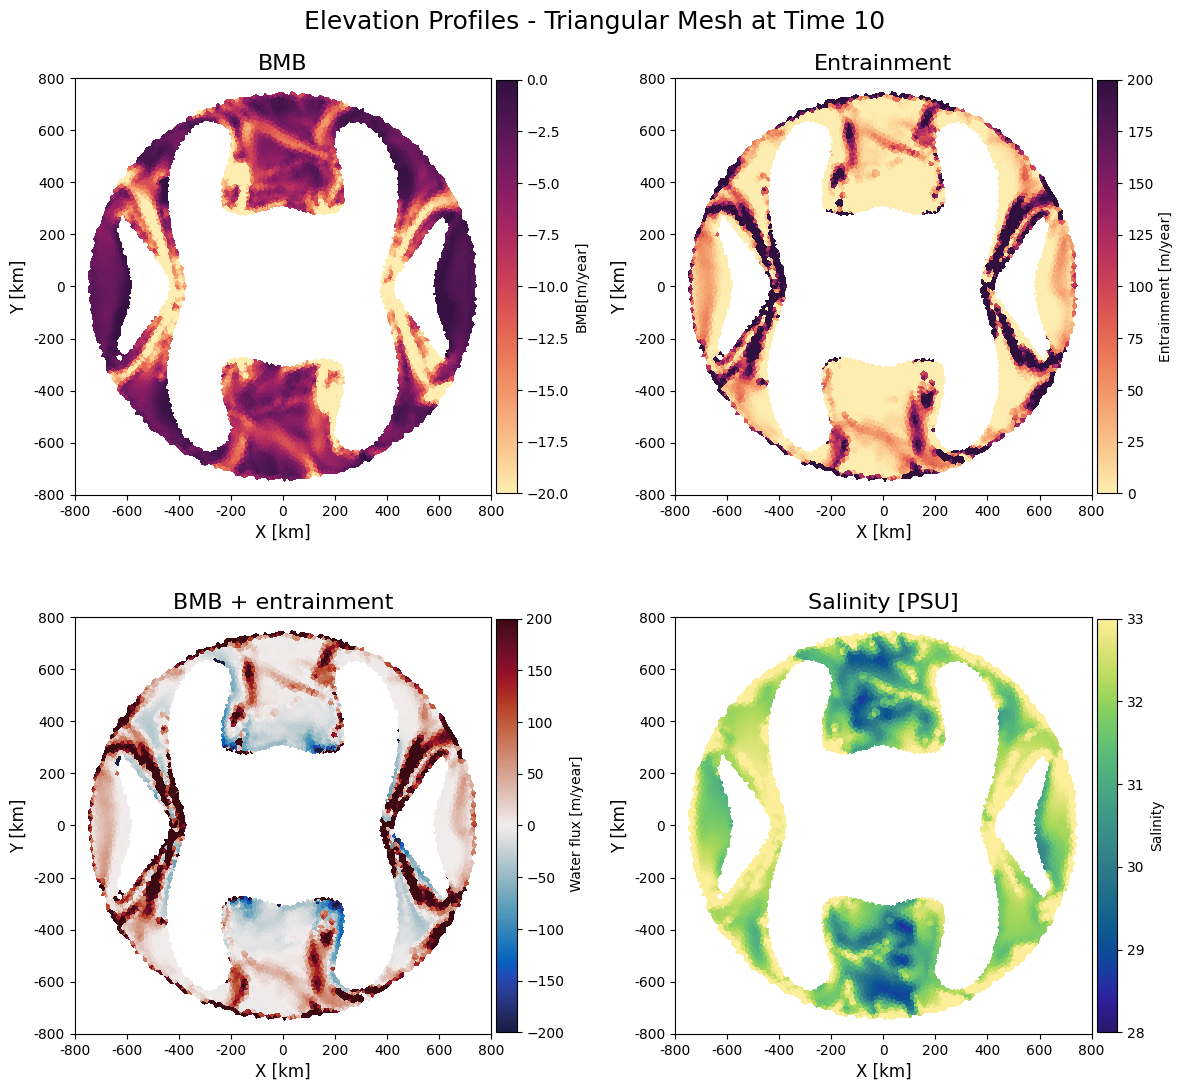

In [19]:
n = 800000

colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 0.8, 
}
 
u = 10
 #############################################################################################################################

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle(f'Elevation Profiles - Triangular Mesh at Time {u}', fontsize=18, x=0.5, y=0.92)


c0 = ax[0, 0].tripcolor(triang, BMB_l[u].where(mask_ocean & mask_rock), cmap=cmo.matter, vmin = -20 , vmax = 0)
fig.colorbar(c0, ax=ax[0, 0], label="BMB[m/year]", **colorbar_kwargs)
ax[0, 0].set_title('BMB', fontsize=14)



c1 = ax[0, 1].tripcolor(triang, E[u].where(mask_ocean & mask_rock)*24*3600*365, cmap=cmo.matter, vmin = 0, vmax=200)
fig.colorbar(c1, ax=ax[0, 1], label="Entrainment [m/year]", **colorbar_kwargs)
ax[0, 1].set_title('Entrainment', fontsize=14)



c2 = ax[1, 0].tripcolor(triang, E[u].where(mask_ocean & mask_rock)*24*3600*365+BMB_l[u].where(mask_ocean & mask_rock), cmap=cmo.balance, vmin=-200, vmax=200)
fig.colorbar(c2, ax=ax[1, 0], label=" Water flux [m/year]", **colorbar_kwargs)
ax[1, 0].set_title('BMB + entrainment', fontsize=14)

c3 = ax[1, 1].tripcolor(triang, S_lad[u].where(mask_ocean & mask_rock), cmap=cmo.haline , vmin =28, vmax=33)
fig.colorbar(c3, ax=ax[1, 1], label="Salinity", **colorbar_kwargs)
ax[1, 1].set_title('Salinity [PSU]', fontsize=14)


for i in range(2):
    for j in range(2):
        ax[i, j].set_aspect('equal')
        ax[i, j].title.set_fontsize(16)
        ax[i, j].set_xlabel('X [km]', fontsize=12)
        ax[i, j].set_ylabel('Y [km]', fontsize=12)
        ax[i, j].set_xticks(np.arange(-n, n + 1, 200000))
        ax[i, j].set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
        ax[i, j].set_yticks(np.arange(-n, n + 1, 200000))
        ax[i, j].set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
        ax[i, j].set_xlim(-n,n)
        ax[i, j].set_ylim(-n,n)
 


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()




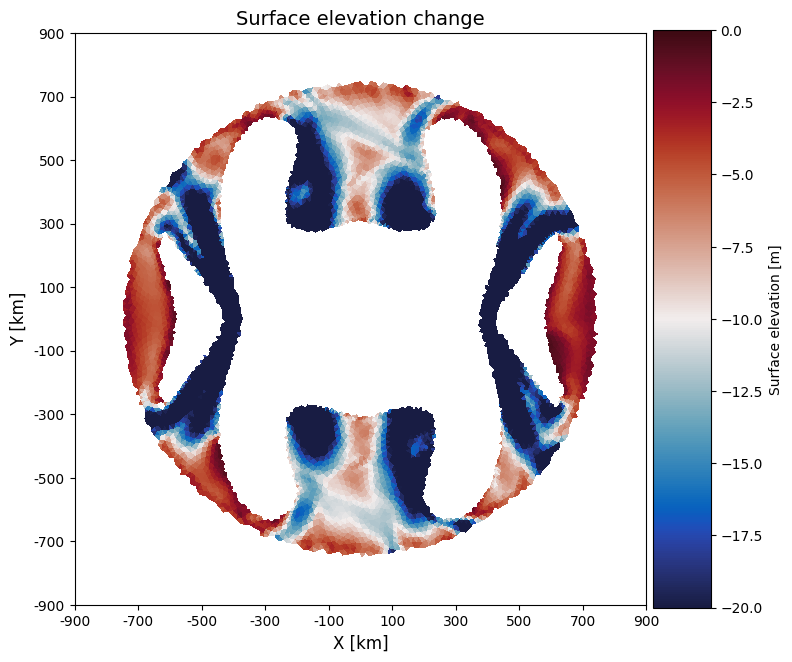

In [74]:
colorbar_kwargs = {
    'aspect': 10,
    'pad': 0.01,
    'shrink': 0.75, 
}

n = 900000
##############################################################################################################################
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 

c0 = ax.tripcolor(triang, (Hs_l[10]-Hs_l[0]).where(mask_ocean & mask_rock), cmap=cmo.balance, vmin=-20, vmax=0)
fig.colorbar(c0, ax=ax, label="Surface elevation [m]", **colorbar_kwargs)
ax.set_title('Surface elevation change', fontsize=14)

ax.set_xlabel('X [km]', fontsize=12)
ax.set_ylabel('Y [km]', fontsize=12)
ax.set_xticks(np.arange(-n, n + 1, 200000))
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_xlim(-n, n)
ax.set_ylim(-n, n)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

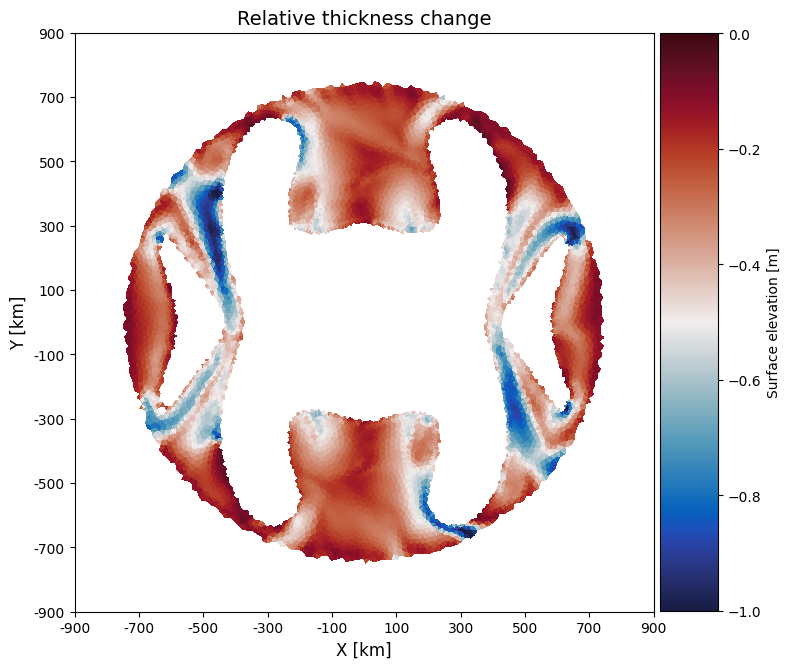

In [77]:
colorbar_kwargs = {
    'aspect': 10,
    'pad': 0.01,
    'shrink': 0.75, 
}

n = 900000
##############################################################################################################################
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 

c0 = ax.tripcolor(triang, (Hi_l[10]-Hi_l[0])/(Hi_l[0]).where(mask_ocean & mask_rock), cmap=cmo.balance, vmin=-1, vmax= 0)
fig.colorbar(c0, ax=ax, label="Surface elevation [m]", **colorbar_kwargs)
ax.set_title('Relative thickness change', fontsize=14)

ax.set_xlabel('X [km]', fontsize=12)
ax.set_ylabel('Y [km]', fontsize=12)
ax.set_xticks(np.arange(-n, n + 1, 200000))
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_xlim(-n, n)
ax.set_ylim(-n, n)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

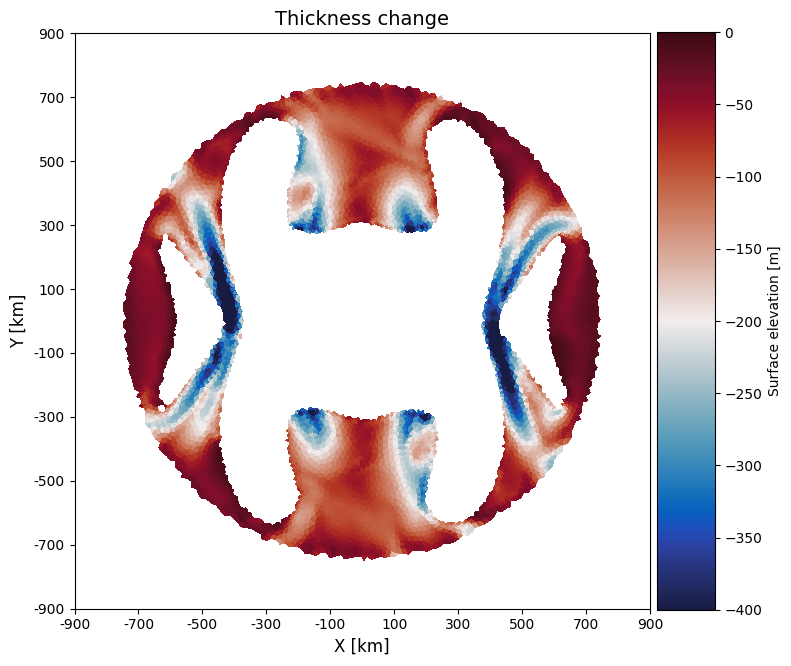

In [71]:
colorbar_kwargs = {
    'aspect': 10,
    'pad': 0.01,
    'shrink': 0.75, 
}

n = 900000
##############################################################################################################################
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 

c0 = ax.tripcolor(triang, (Hi_l[10]-Hi_l[0]).where(mask_ocean & mask_rock), cmap=cmo.balance, vmin=-400, vmax= 0)
fig.colorbar(c0, ax=ax, label="Surface elevation [m]", **colorbar_kwargs)
ax.set_title('Thickness change', fontsize=14)

ax.set_xlabel('X [km]', fontsize=12)
ax.set_ylabel('Y [km]', fontsize=12)
ax.set_xticks(np.arange(-n, n + 1, 200000))
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_xlim(-n, n)
ax.set_ylim(-n, n)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

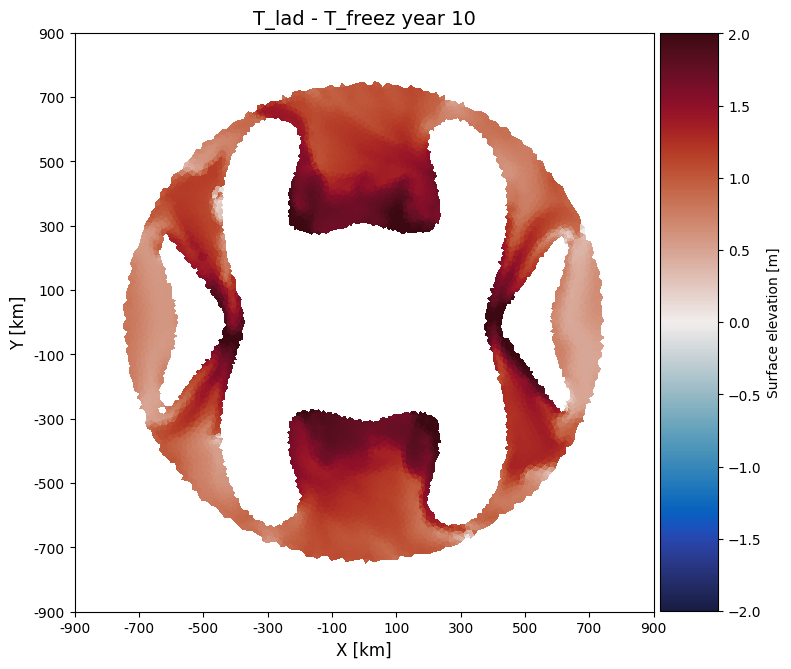

In [20]:
colorbar_kwargs = {
    'aspect': 10,
    'pad': 0.01,
    'shrink': 0.75, 
}

n = 900000
##############################################################################################################################
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 

c0 = ax.tripcolor(triang, (T_lad[10]-T_fp[10]).where(mask_ocean & mask_rock), cmap=cmo.balance, vmin=-2, vmax= 2)
fig.colorbar(c0, ax=ax, label="Surface elevation [m]", **colorbar_kwargs)
ax.set_title('T_lad - T_freez year 10', fontsize=14)

ax.set_xlabel('X [km]', fontsize=12)
ax.set_ylabel('Y [km]', fontsize=12)
ax.set_xticks(np.arange(-n, n + 1, 200000))
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_xlim(-n, n)
ax.set_ylim(-n, n)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

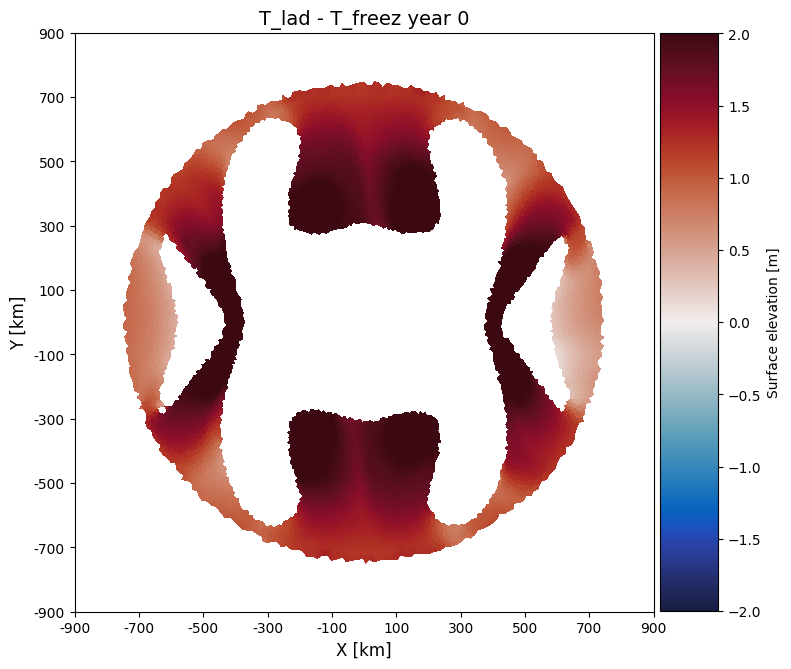

In [18]:
colorbar_kwargs = {
    'aspect': 10,
    'pad': 0.01,
    'shrink': 0.75, 
}

n = 900000
##############################################################################################################################
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 

c0 = ax.tripcolor(triang, (T_lad[0]-T_fp[0]).where(mask_ocean & mask_rock), cmap=cmo.balance, vmin=-2, vmax= 2)
fig.colorbar(c0, ax=ax, label="Surface elevation [m]", **colorbar_kwargs)
ax.set_title('T_lad - T_freez year 0', fontsize=14)

ax.set_xlabel('X [km]', fontsize=12)
ax.set_ylabel('Y [km]', fontsize=12)
ax.set_xticks(np.arange(-n, n + 1, 200000))
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_xlim(-n, n)
ax.set_ylim(-n, n)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

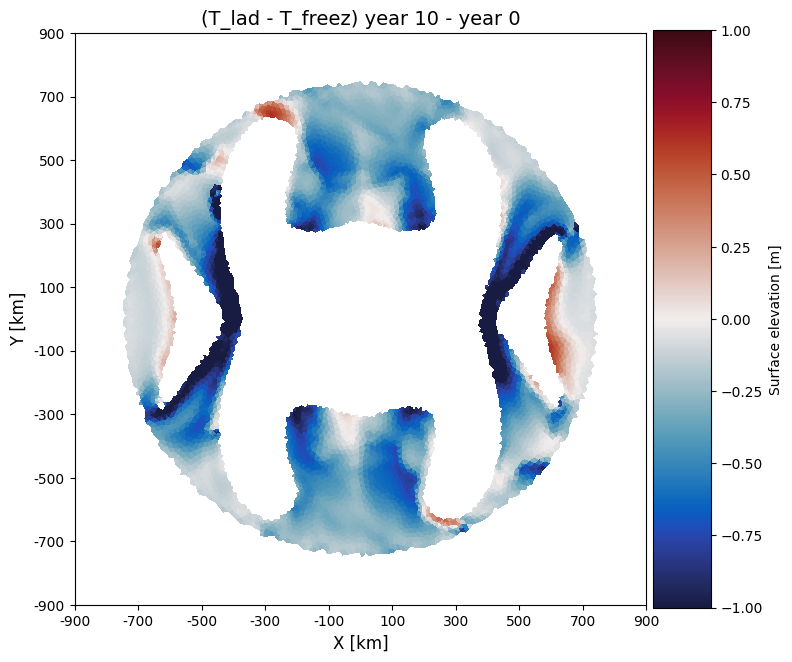

In [31]:
colorbar_kwargs = {
    'aspect': 10,
    'pad': 0.01,
    'shrink': 0.75, 
}

n = 900000
##############################################################################################################################
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 

c0 = ax.tripcolor(triang, (T_lad[10] - T_fp[10]- (T_lad[0]-T_fp[0])).where(mask_ocean & mask_rock), cmap=cmo.balance, vmin=-1, vmax= 1)
fig.colorbar(c0, ax=ax, label="Surface elevation [m]", **colorbar_kwargs)
ax.set_title('(T_lad - T_freez) year 10 - year 0', fontsize=14)

ax.set_xlabel('X [km]', fontsize=12)
ax.set_ylabel('Y [km]', fontsize=12)
ax.set_xticks(np.arange(-n, n + 1, 200000))
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_xlim(-n, n)
ax.set_ylim(-n, n)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

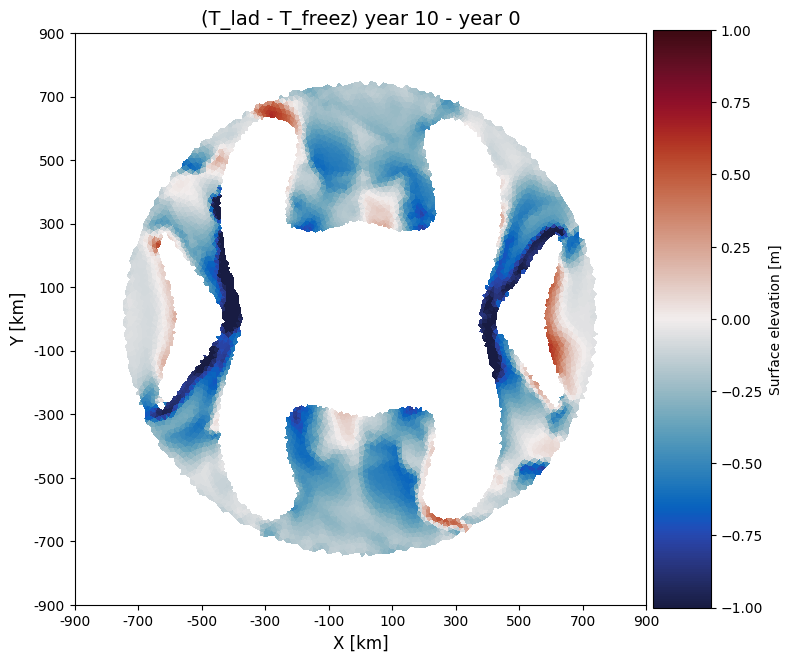

In [32]:
colorbar_kwargs = {
    'aspect': 10,
    'pad': 0.01,
    'shrink': 0.75, 
}

n = 900000
##############################################################################################################################
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 

c0 = ax.tripcolor(triang, (T_lad[10] - T_lad[0]).where(mask_ocean & mask_rock), cmap=cmo.balance, vmin=-1, vmax= 1)
fig.colorbar(c0, ax=ax, label="Surface elevation [m]", **colorbar_kwargs)
ax.set_title('(T_lad - T_freez) year 10 - year 0', fontsize=14)

ax.set_xlabel('X [km]', fontsize=12)
ax.set_ylabel('Y [km]', fontsize=12)
ax.set_xticks(np.arange(-n, n + 1, 200000))
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_xlim(-n, n)
ax.set_ylim(-n, n)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

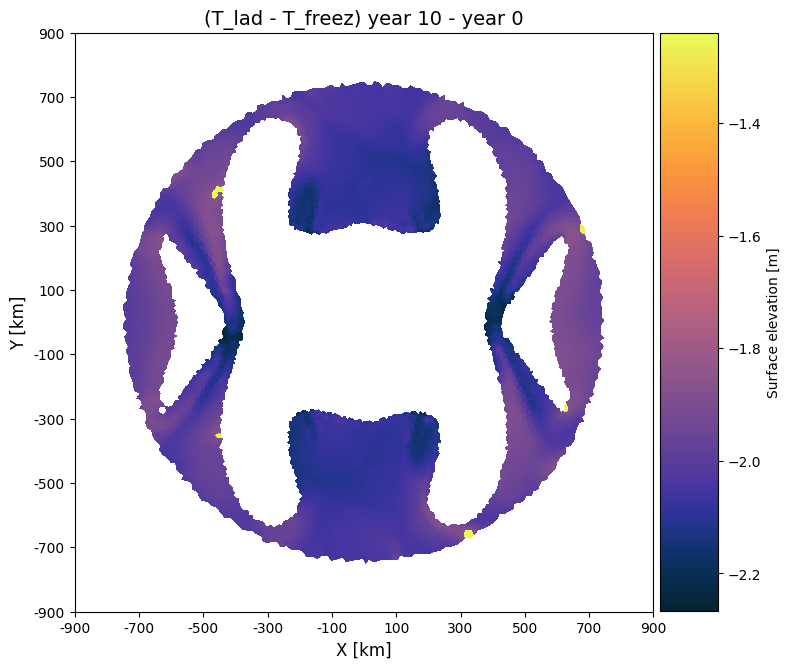

In [25]:
colorbar_kwargs = {
    'aspect': 10,
    'pad': 0.01,
    'shrink': 0.75, 
}

n = 900000
##############################################################################################################################
fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 

c0 = ax.tripcolor(triang, (T_fp[10]).where(mask_ocean & mask_rock), cmap=cmo.thermal )#, vmin=-0.5, vmax= 0.5)
fig.colorbar(c0, ax=ax, label="Surface elevation [m]", **colorbar_kwargs)
ax.set_title('(T_lad - T_freez) year 10 - year 0', fontsize=14)

ax.set_xlabel('X [km]', fontsize=12)
ax.set_ylabel('Y [km]', fontsize=12)
ax.set_xticks(np.arange(-n, n + 1, 200000))
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_xlim(-n, n)
ax.set_ylim(-n, n)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

### Speed

In [35]:
Tricc = Lad['Tricc']
Mag = np.sqrt(U_lad**2 + V_lad**2)

distancess = np.sqrt(Tricc[0, :]**2 + Tricc[1, :]**2)
radius = 750000
mask_ocean2 = distances <= radius

/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/xarray/core/common.py:180: RuntimeWarning: invalid value encountered in cast
  return np.array(self.values, dtype=dtype, copy=copy)


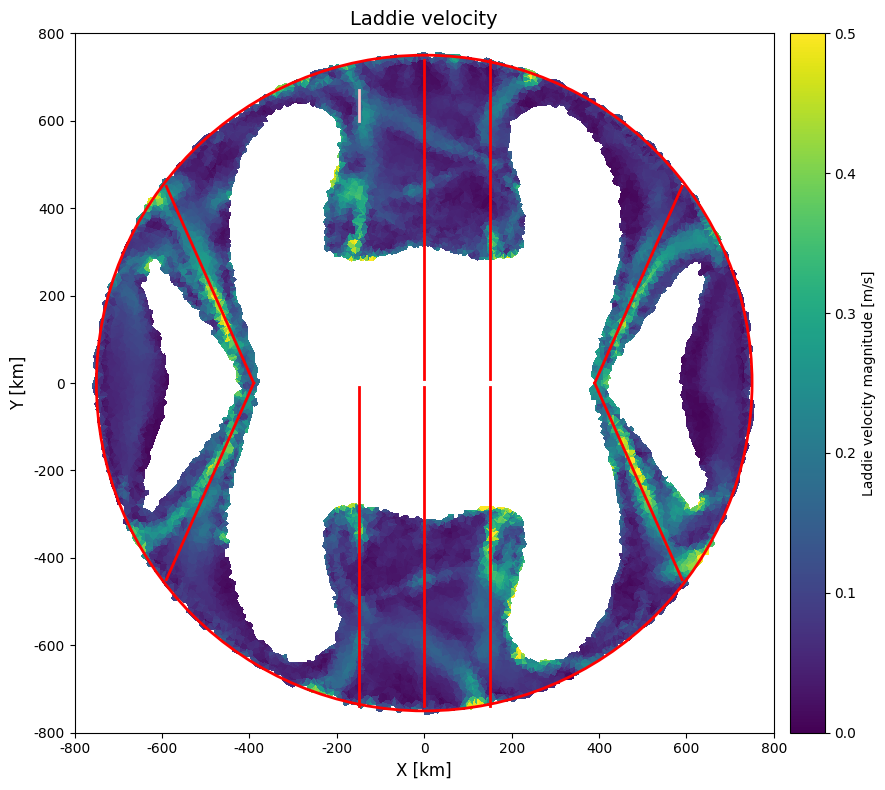

In [36]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 1, 
}
u = 10
m = 4
subsampled_mask = (Mag[u][::m] >= 0.01) 

##############################################################################################################################
fig, ax = plt.subplots(1, 1, figsize=(16, 8)) 

c0 = ax.tripcolor(
    Tricc[0, :], 
    Tricc[1, :], 
    Mag[u].where(Mag[0] != 0), 
    cmap='viridis', 
    vmin=0, 
    vmax=0.5
)

fig.colorbar(c0, ax=ax, label="Laddie velocity magnitude [m/s]", **colorbar_kwargs)
ax.set_title('Laddie velocity', fontsize=14)

'''
plt.quiver(Tricc[0, :][::m][subsampled_mask],
    Tricc[1, :][::m][subsampled_mask],
    U_lad[u][::m][subsampled_mask],
    V_lad[u][::m][subsampled_mask],
    scale=10,
    width=0.002,
    headwidth=2,
    headlength=2,
    headaxislength=3,
    color = 'k'
)
plt.quiverkey(
    plt.quiver(0, 0, 0, 0, scale=10, width=0.002),
    X=0.75,
    Y=0.9,
    U=0.25,
    label=' 25 cm/s',
    labelpos='E',
    coordinates='figure',
    color='k'
)
'''

circle = plt.Circle((0, 0), 750000, color='red', fill=False, linestyle='-', linewidth=2)
ax.add_artist(circle)
ax.set_aspect('equal')

ax.plot([150000, 150000], [10000, 740000], color='red', linestyle='-', linewidth=2)
ax.plot([150000, 150000], [-10000, -740000], color='red', linestyle='-', linewidth=2)
ax.plot([0, 0], [-10000, -740000], color='red', linestyle='-', linewidth=2)
ax.plot([0, 0], [10000, 740000], color='red', linestyle='-', linewidth=2)
#ax.plot([-150000, -150000], [10000, 740000], color='red', linestyle='-', linewidth=2)
ax.plot([-150000, -150000], [-10000, -740000], color='red', linestyle='-', linewidth=2)

ax.plot([-150000, -150000], [600000, 670000], color='pink', linestyle='-', linewidth=2)

#ax.plot([-180000, 180000], [680000, 480000], color='pink', linestyle='-', linewidth=2)
#ax.plot([-180000, 180000], [380000, 520000], color='pink', linestyle='-', linewidth=2)
#ax.plot([-180000, 180000], [-480000, -680000], color='pink', linestyle='-', linewidth=2)
#ax.plot([-180000, 180000], [-520000, -380000], color='pink', linestyle='-', linewidth=2)

ax.plot([390000, 590000], [0, 450000], color='red', linestyle='-', linewidth=2)
ax.plot([-390000, -590000], [0, 450000], color='red', linestyle='-', linewidth=2)
ax.plot([-390000,- 590000], [0, -450000], color='red', linestyle='-', linewidth=2)
ax.plot([390000, 590000], [0, -450000], color='red', linestyle='-', linewidth=2)

ax.set_aspect('equal')
ax.set_xlabel('X [km]', fontsize=12)
ax.set_ylabel('Y [km]', fontsize=12)
ax.set_xticks(np.arange(-n, n + 1, 200000))
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_xlim(-n, n)
ax.set_ylim(-n, n)

plt.tight_layout()
plt.show()

In [37]:
magice = np.sqrt(u_s**2 + v_s**2)
magice[3]

NameError: name 'u_s' is not defined

NameError: name 'Tricc' is not defined

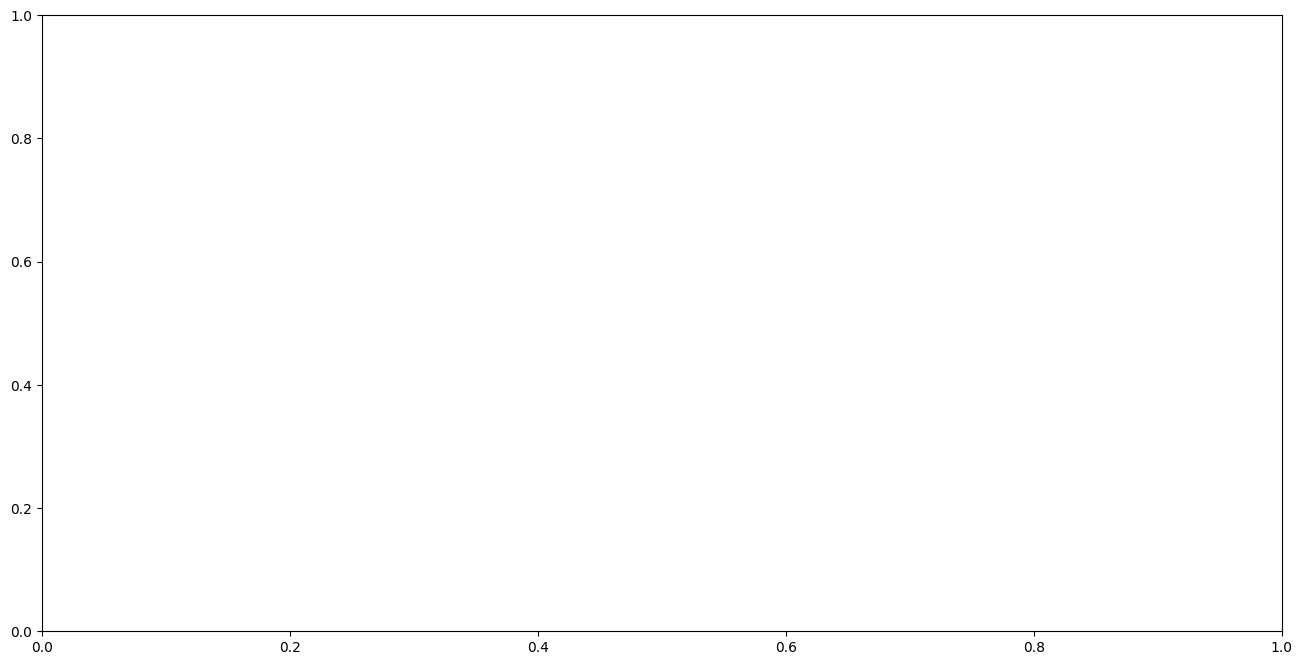

In [ ]:
mask = mask_ocean

##############################################################################################################################
fig, ax = plt.subplots(1, 1, figsize=(16, 8)) 

c0 = ax.tripcolor(
    Tricc[0, :], 
    Tricc[1, :], 
    magice[u].where(mask), 
    cmap='viridis', 
    vmin=0, 
    vmax=400
)

fig.colorbar(c0, ax=ax, label="Velocity magnitude [m/y]", **colorbar_kwargs)
ax.set_title('Ice velocity', fontsize=14)

u_s_norm = u_s[u][::m] / np.sqrt(u_s[u][::m]**2 + v_s[u][::m]**2)
v_s_norm = v_s[u][::m] / np.sqrt(u_s[u][::m]**2 + v_s[u][::m]**2)

plt.quiver(Tricc[0, :][::m],
    Tricc[1, :][::m],
    u_s_norm,
    v_s_norm,
    scale=50,
    width=0.002,
    headwidth=3,
    headlength=4,
    headaxislength=3
)

plt.quiverkey(
    plt.quiver(0, 0, 0, 0, scale=10000, width=0.002),
    X=0.75,
    Y=0.97,
    U= 200,
    label='Normalized quivers',
    labelpos='E',
    coordinates='figure',
    color='k'
)

ax.set_aspect('equal')
ax.set_xlabel('X [km]', fontsize=12)
ax.set_ylabel('Y [km]', fontsize=12)
ax.set_xticks(np.arange(-n, n + 1, 200000))
ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_yticks(np.arange(-n, n + 1, 200000))
ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
ax.set_xlim(-n, n)
ax.set_ylim(-n, n)

plt.tight_layout()
plt.show()


In [ ]:
plt.close('all')

# New tests 

In [27]:
u = 3

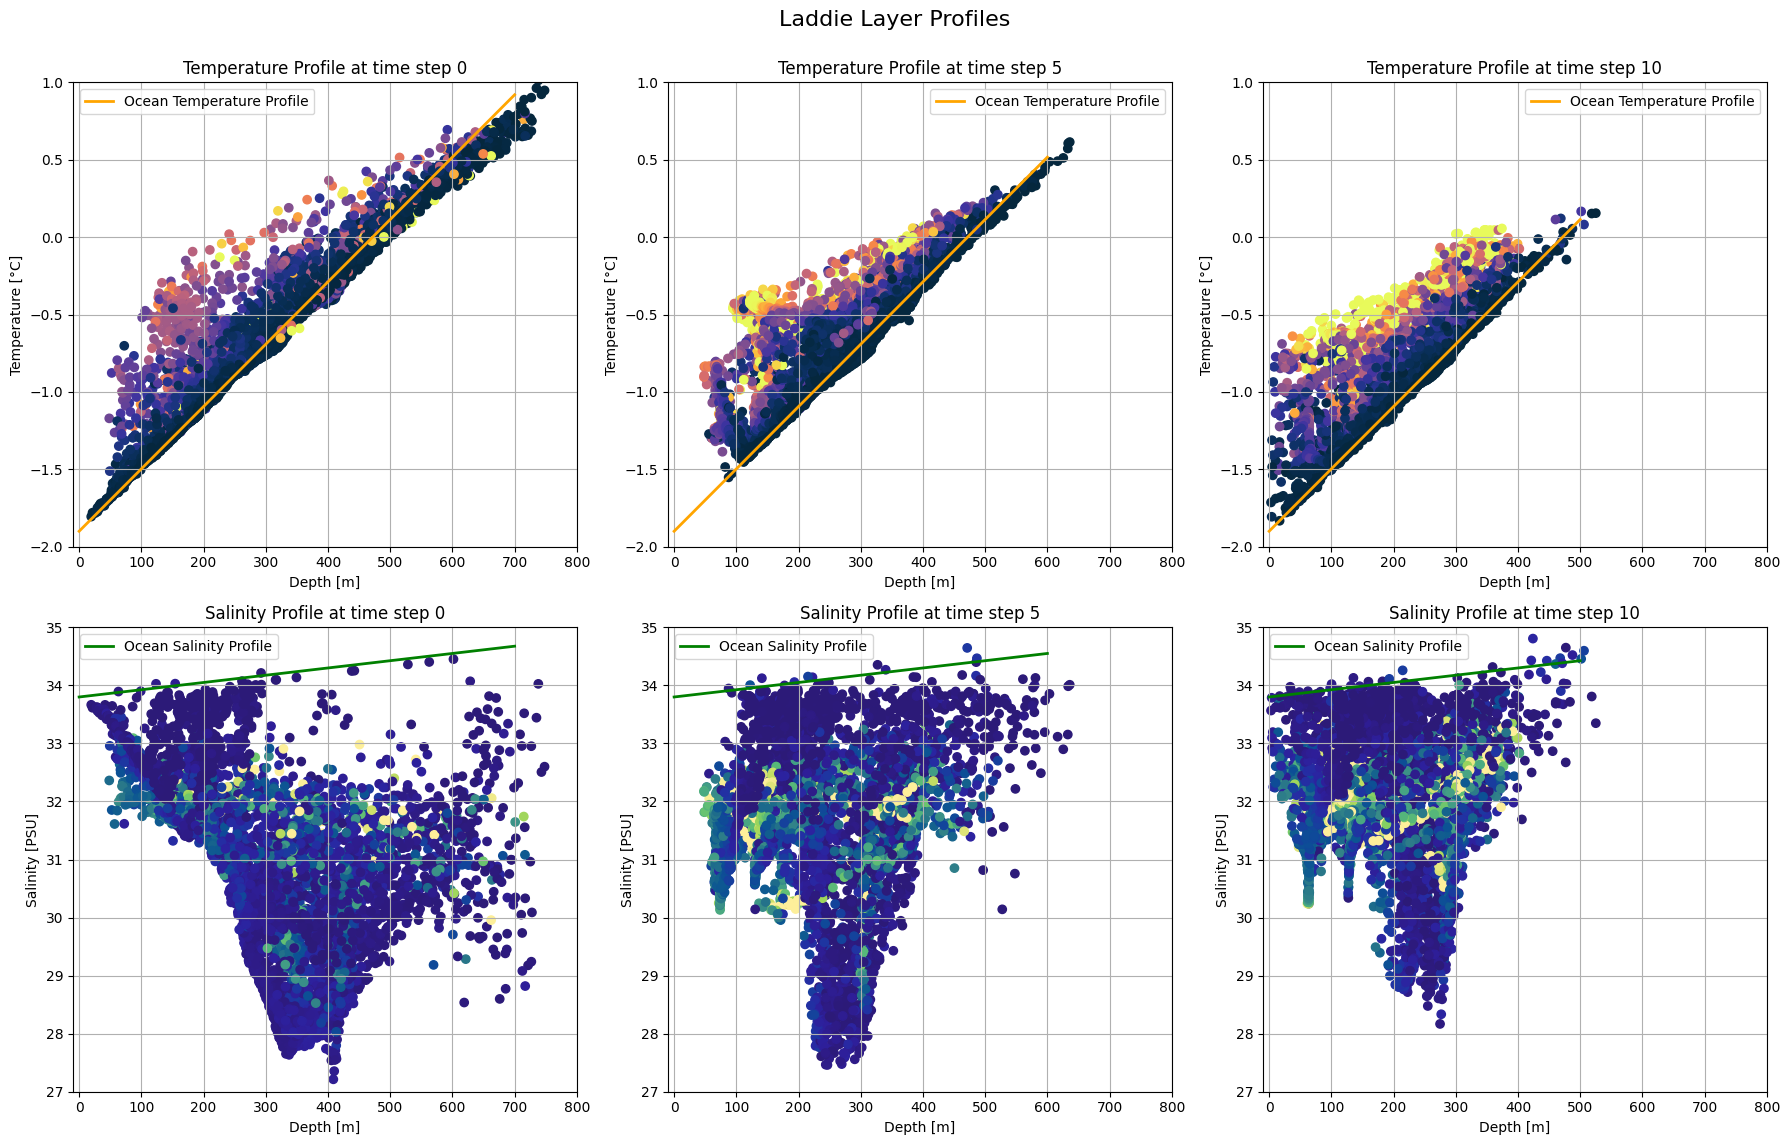

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Create a 2x3 grid of subplots
fig.suptitle("Laddie Layer Profiles", fontsize=16, x= 0.5 , y = 0.95)

u = [0,5,10]
k = [8,7,6]

for i in range (3):
    Thick = Hib_l[u[i]].where(mask_rock & mask_ocean) - H_lad[u[i]]
    scatter = axes[0, i].scatter(-Thick, T_lad[u[i]], c=H_lad[u[i]], cmap=cmo.thermal, vmin=-0, vmax=50)
    axes[0, i].plot(To.depth[0:k[i]], To[0:k[i], 0], label="Ocean Temperature Profile", color="orange", linewidth=2)
    axes[0, i].set_xlabel("Depth [m]")
    axes[0, i].set_ylabel("Temperature [°C]")
    axes[0, i].set_title(f"Temperature Profile at time step {u[i]}")
    axes[0, i].legend()
    axes[0, i].grid()
    axes[0, i].set_xlim(-10,800)
    axes[0, i].set_ylim(-2,1)
    #fig.colorbar(scatter, ax=axes[0, i])


for i in range (3):
    Thick = Hib_l[u[i]].where(mask_rock & mask_ocean) - H_lad[u[i]]
    scatter = axes[1, i].scatter(-Thick, S_lad[u[i]], c=H_lad[u[i]], cmap=cmo.haline, vmin=-0, vmax=50)
    axes[1, i].plot(To.depth[0:k[i]], So[0:k[i], 0], label="Ocean Salinity Profile", color="green", linewidth=2)
    axes[1, i].set_xlabel("Depth [m]")
    axes[1, i].set_ylabel("Salinity [PSU]")
    axes[1, i].set_title(f"Salinity Profile at time step {u[i]}")
    axes[1, i].legend()
    axes[1, i].grid()
    axes[1, i].set_xlim(-10,800)
    axes[1, i].set_ylim(27,35)
    #fig.colorbar(scatter, ax=axes[1, i])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()

In [17]:
n = 800000
years = [0, 5, 10]

/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_6736/2372166450.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)  # Reduced padding


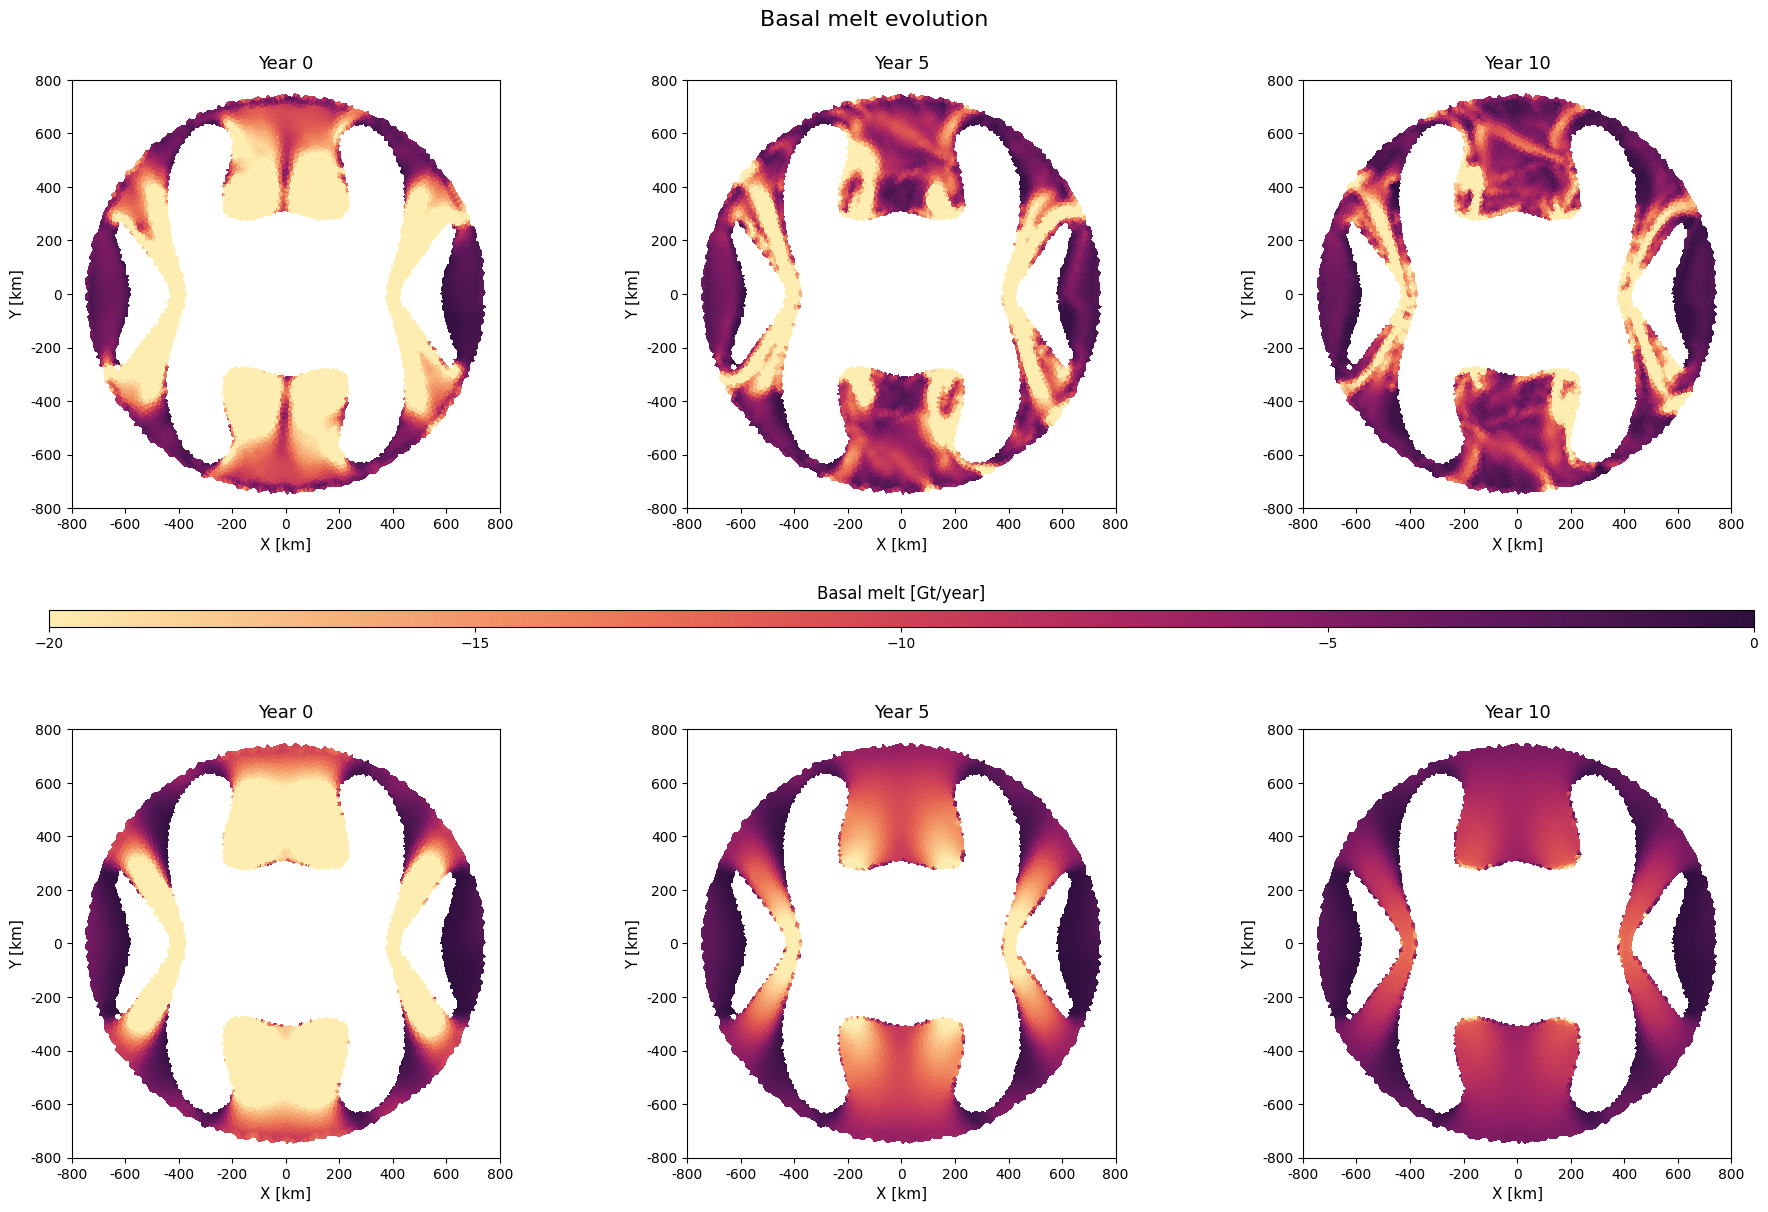

In [32]:
fig = plt.figure(figsize=(22, 14))  # Slightly reduced figure size
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 0.04, 1], hspace=0.35, wspace=0.3)  # Tighter spacing

# Create subplots
axes = []
for i in range(6):
    if i < 3:
        axes.append(fig.add_subplot(gs[0, i]))  # First row
    else:
        axes.append(fig.add_subplot(gs[2, i-3]))  # Third row

# Create horizontal colorbar axis between rows
cax = fig.add_subplot(gs[1, :])  # Span all columns in middle row

for i, year in enumerate(years):
    ax = axes[i]
    # Main plot with contour lines
    c0 = ax.tripcolor(triang, BMB_l[year].where(mask_rock&mask_ocean), cmap=cmo.matter, vmin = -20 , vmax = 0)

    ax.set_title(f'Year {year}', fontsize=13, pad=8)  # Reduced padding
    ax.set_xlabel('X [km]', fontsize=11)
    ax.set_ylabel('Y [km]', fontsize=11)
    ax.set_xticks(np.arange(-n, n+1, 200000))
    ax.set_yticks(np.arange(-n, n+1, 200000))
    ax.set_xticklabels(np.arange(-800, 801, 200))  # Direct labels
    ax.set_yticklabels(np.arange(-800, 801, 200))
    ax.set_xlim(-n, n)
    ax.set_ylim(-n, n)
    ax.set_aspect('equal')
    
    # Colorbar formatting
    cbar = fig.colorbar(c0, cax=cax, orientation='horizontal')
    cbar.set_label('Basal melt [Gt/year]', fontsize=12, labelpad=8)
    cbar.set_ticks(np.arange(-20, 1, 5))  # Match contour levels
    cbar.ax.tick_params(labelsize=10)  # Adjust tick label size
    cax.xaxis.set_ticks_position('bottom')
    cax.xaxis.set_label_position('top')


for i, year in enumerate(years):
    ax = axes[i+3]
    # Main plot with contour lines
    c0 = ax.tripcolor(triangq, BMB_q[year].where(mask_rock&mask_ocean),  cmap=cmo.matter, vmin = -20 , vmax = 0)

    ax.set_title(f'Year {year}', fontsize=13, pad=8)  # Reduced padding
    ax.set_xlabel('X [km]', fontsize=11)
    ax.set_ylabel('Y [km]', fontsize=11)
    ax.set_xticks(np.arange(-n, n+1, 200000))
    ax.set_yticks(np.arange(-n, n+1, 200000))
    ax.set_xticklabels(np.arange(-800, 801, 200))  # Direct labels
    ax.set_yticklabels(np.arange(-800, 801, 200))
    ax.set_xlim(-n, n)
    ax.set_ylim(-n, n)
    ax.set_aspect('equal')
    # Colorbar formatting


# Main title with adjusted position
plt.suptitle('Basal melt evolution', 
            fontsize=16, y=0.93)  # More compact title
plt.tight_layout(pad=1.5)  # Reduced padding
plt.show()